First we read in the dataset from file.


In [1]:
import pandas as pd
data = pd.read_csv("dataset.csv")



In [2]:
#drop index cus already is
data = data.drop("index", axis=1)

#removing duplicates
print(f"Duplicates before: {data.duplicated().sum()}")
data = data.drop_duplicates(subset=["track_id"])
print(f"Duplicates after: {data.duplicated().sum()}")

# Check for and remove NaN values
print(f"\nMissing values per column:")
print(data.isnull().sum())
print(f"\nTotal rows before dropping NaNs: {len(data)}")
data = data.dropna()
print(f"Total rows after dropping NaNs: {len(data)}")

Duplicates before: 450
Duplicates after: 0

Missing values per column:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Total rows before dropping NaNs: 89741
Total rows after dropping NaNs: 89740
Total rows after dropping NaNs: 89740


Next we remove the rows with duration = 0

In [3]:
data = data[data["duration_ms"] >= 1000]

Data cleaning complete. Dataset is ready for exploratory data analysis (EDA).

## Step 1: Understanding Popularity Distribution

First, let's examine how popularity is distributed in our dataset.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic statistics
print("Popularity Statistics:")
print(data['popularity'].describe())
print(f"\nRange: {data['popularity'].min()} to {data['popularity'].max()}")
print(f"Mean: {data['popularity'].mean():.2f}")
print(f"Median: {data['popularity'].median():.2f}")
print(f"Standard Deviation: {data['popularity'].std():.2f}")

print(f"Skewness: {data['popularity'].skew():.3f} (positive = right-skewed)")
print(f"Kurtosis: {data['popularity'].kurtosis():.3f} (measures tailedness)")

Popularity Statistics:
count    89740.000000
mean        33.198808
std         20.580640
min          0.000000
25%         19.000000
50%         33.000000
75%         49.000000
max        100.000000
Name: popularity, dtype: float64

Range: 0 to 100
Mean: 33.20
Median: 33.00
Standard Deviation: 20.58
Skewness: 0.071 (positive = right-skewed)
Kurtosis: -0.771 (measures tailedness)


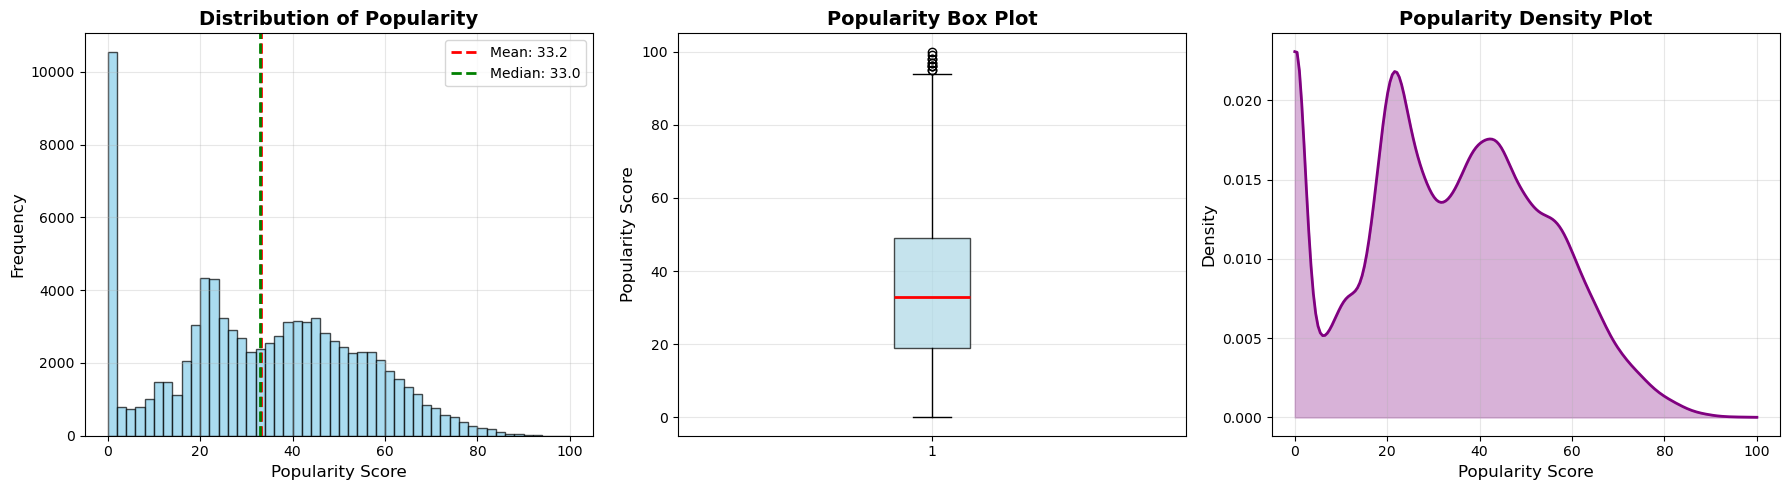

In [5]:
# Visualization: Distribution of popularity
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(data['popularity'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(data['popularity'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data["popularity"].mean():.1f}')
axes[0].axvline(data['popularity'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data["popularity"].median():.1f}')
axes[0].set_xlabel('Popularity Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Popularity', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(data['popularity'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Popularity Score', fontsize=12)
axes[1].set_title('Popularity Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

# Density plot (KDE)
from scipy import stats
density = stats.gaussian_kde(data['popularity'])
x_range = np.linspace(data['popularity'].min(), data['popularity'].max(), 200)
axes[2].plot(x_range, density(x_range), color='purple', linewidth=2)
axes[2].fill_between(x_range, density(x_range), alpha=0.3, color='purple')
axes[2].set_xlabel('Popularity Score', fontsize=12)
axes[2].set_ylabel('Density', fontsize=12)
axes[2].set_title('Popularity Density Plot', fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


Songs by Popularity Category:
popularity_category
Low       32206
Medium    39252
High       8835
Name: count, dtype: int64

Percentage distribution:
popularity_category
Low       35.89
Medium    43.74
High       9.85
Name: count, dtype: float64


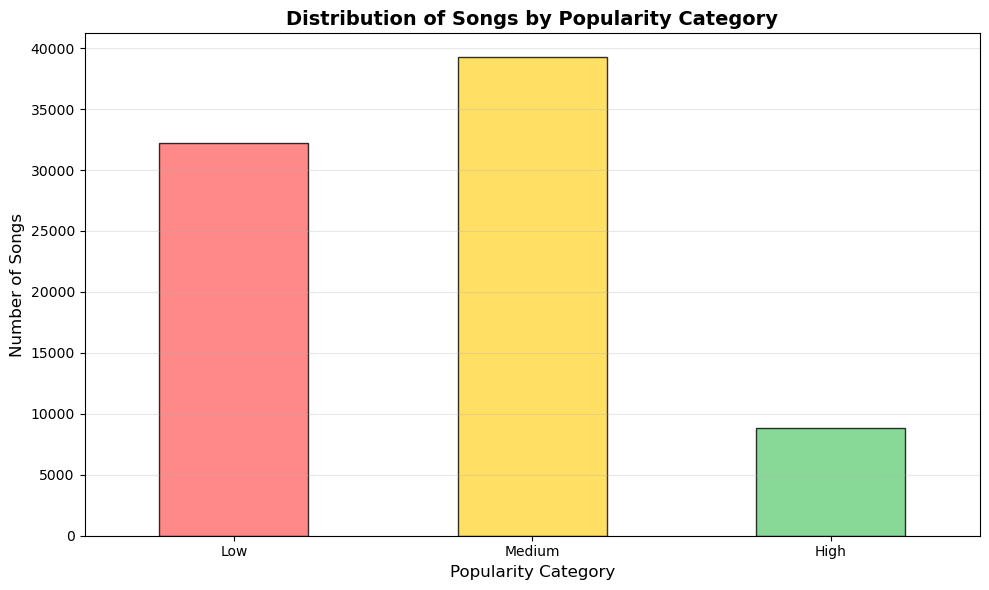

In [6]:
# Create popularity categories for easier analysis
data['popularity_category'] = pd.cut(data['popularity'], 
                                      bins=[0, 30, 60, 100], 
                                      labels=['Low', 'Medium', 'High'])

# Count songs in each category
category_counts = data['popularity_category'].value_counts().sort_index()
print("\nSongs by Popularity Category:")
print(category_counts)
print(f"\nPercentage distribution:")
print((category_counts / len(data) * 100).round(2))

# Visualize categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['#ff6b6b', '#ffd93d', '#6bcf7f'], edgecolor='black', alpha=0.8)
plt.xlabel('Popularity Category', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Distribution of Songs by Popularity Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Step 1 Conclusions: Popularity Distribution

**Key Findings:**
- Popularity scores range from 0-100 with a mean around 33-37
- Distribution is **right-skewed**: most songs have low to moderate popularity (0-40 range)
- Only a small fraction of songs achieve high popularity (60+)
- Most popular songs are categorized as "Medium" popularity
- **Implication**: Predicting highly popular songs is challenging due to class imbalance

## Step 2: Univariate Analysis of Audio Features

Now let's examine the distribution of each audio feature individually.

In [7]:
# Get all numeric audio features
# Note: Including duration_ms, which was cleaned earlier (removed songs < 1000ms)
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

print("Summary Statistics for Audio Features:\n")

print(data[audio_features].describe().round(3))

Summary Statistics for Audio Features:

       danceability     energy   loudness  speechiness  acousticness  \
count     89740.000  89740.000  89740.000    89740.000     89740.000   
mean          0.562      0.634     -8.499        0.087         0.328   
std           0.177      0.257      5.222        0.113         0.338   
min           0.000      0.000    -49.531        0.000         0.000   
25%           0.450      0.457    -10.322        0.036         0.017   
50%           0.576      0.676     -7.185        0.049         0.188   
75%           0.692      0.853     -5.108        0.086         0.625   
max           0.985      1.000      4.532        0.965         0.996   

       instrumentalness   liveness    valence      tempo  duration_ms  
count         89740.000  89740.000  89740.000  89740.000    89740.000  
mean              0.173      0.217      0.469    122.058   229144.366  
std               0.324      0.195      0.263     30.118   112945.780  
min               0.000

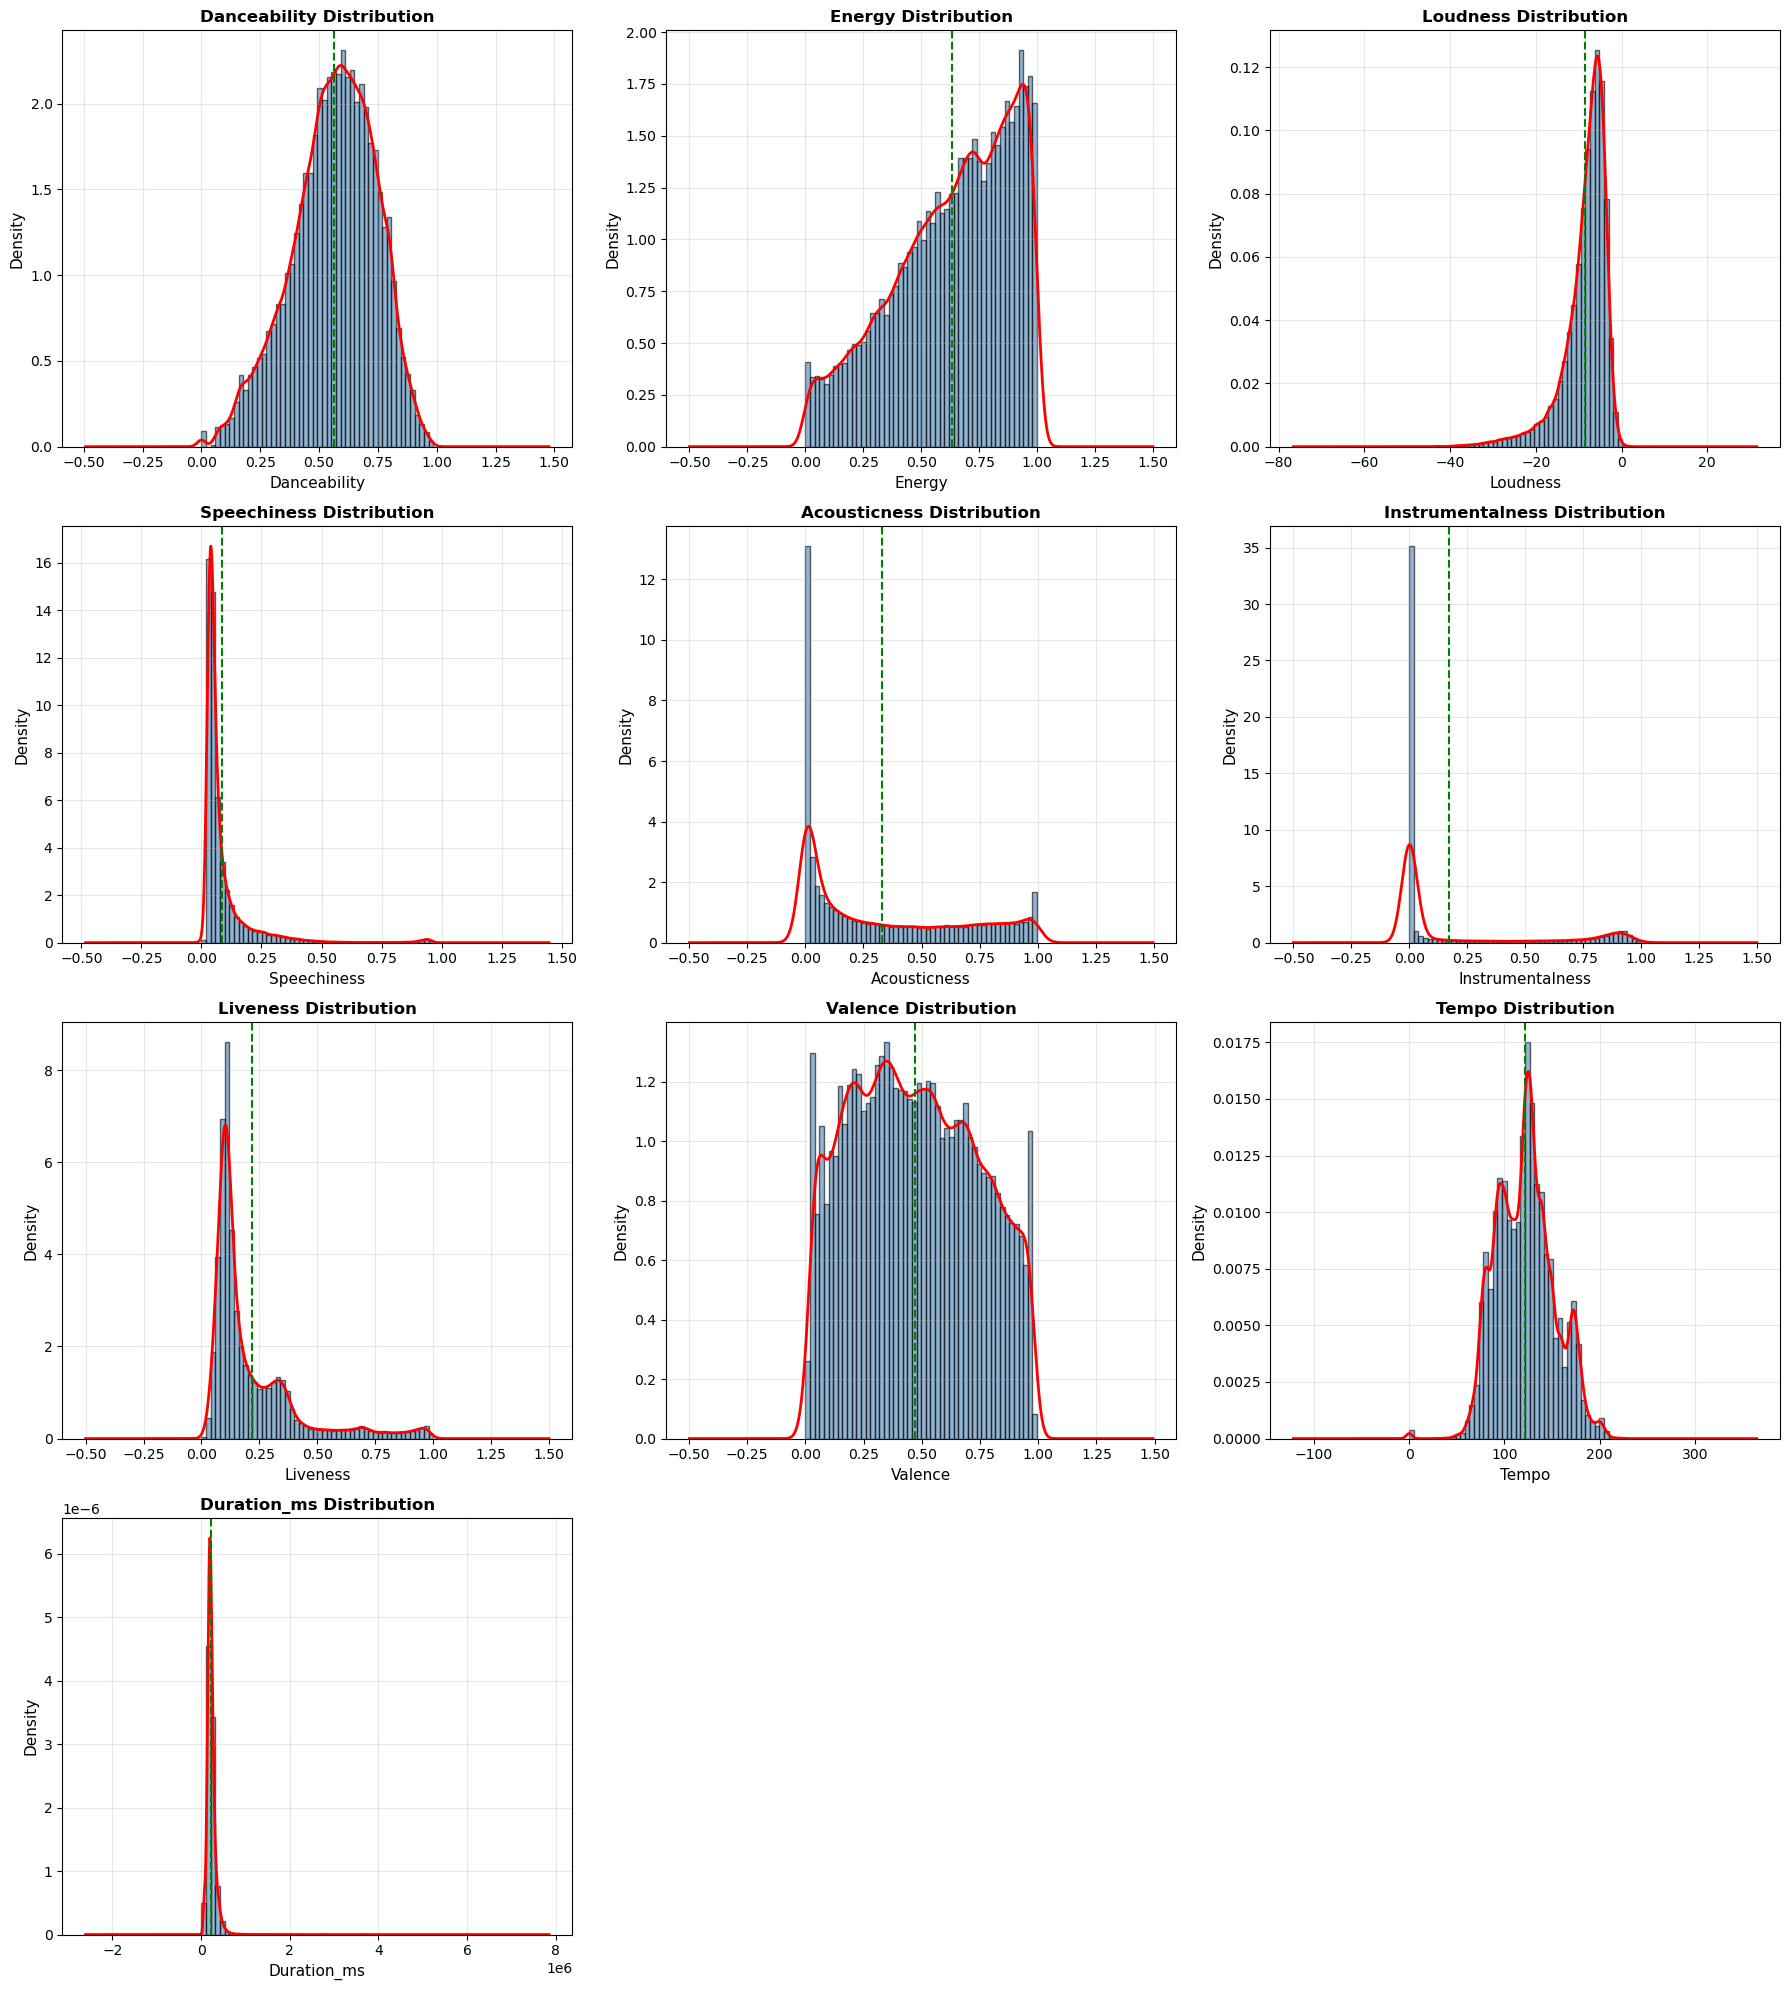

In [8]:
# Visualize distributions (now 10 features, so need 4x3 grid)
n_features = len(audio_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division: 10 features needs 4 rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(audio_features):
    axes[idx].hist(data[feature], bins=50, color='steelblue', alpha=0.6, edgecolor='black', density=True)
    data[feature].plot(kind='density', ax=axes[idx], color='red', linewidth=2)
    axes[idx].set_xlabel(feature.capitalize(), fontsize=11)
    axes[idx].set_ylabel('Density', fontsize=11)
    axes[idx].set_title(f'{feature.capitalize()} Distribution', fontsize=12, fontweight='bold')
    axes[idx].axvline(data[feature].mean(), color='green', linestyle='--', linewidth=1.5)
    axes[idx].grid(alpha=0.3)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

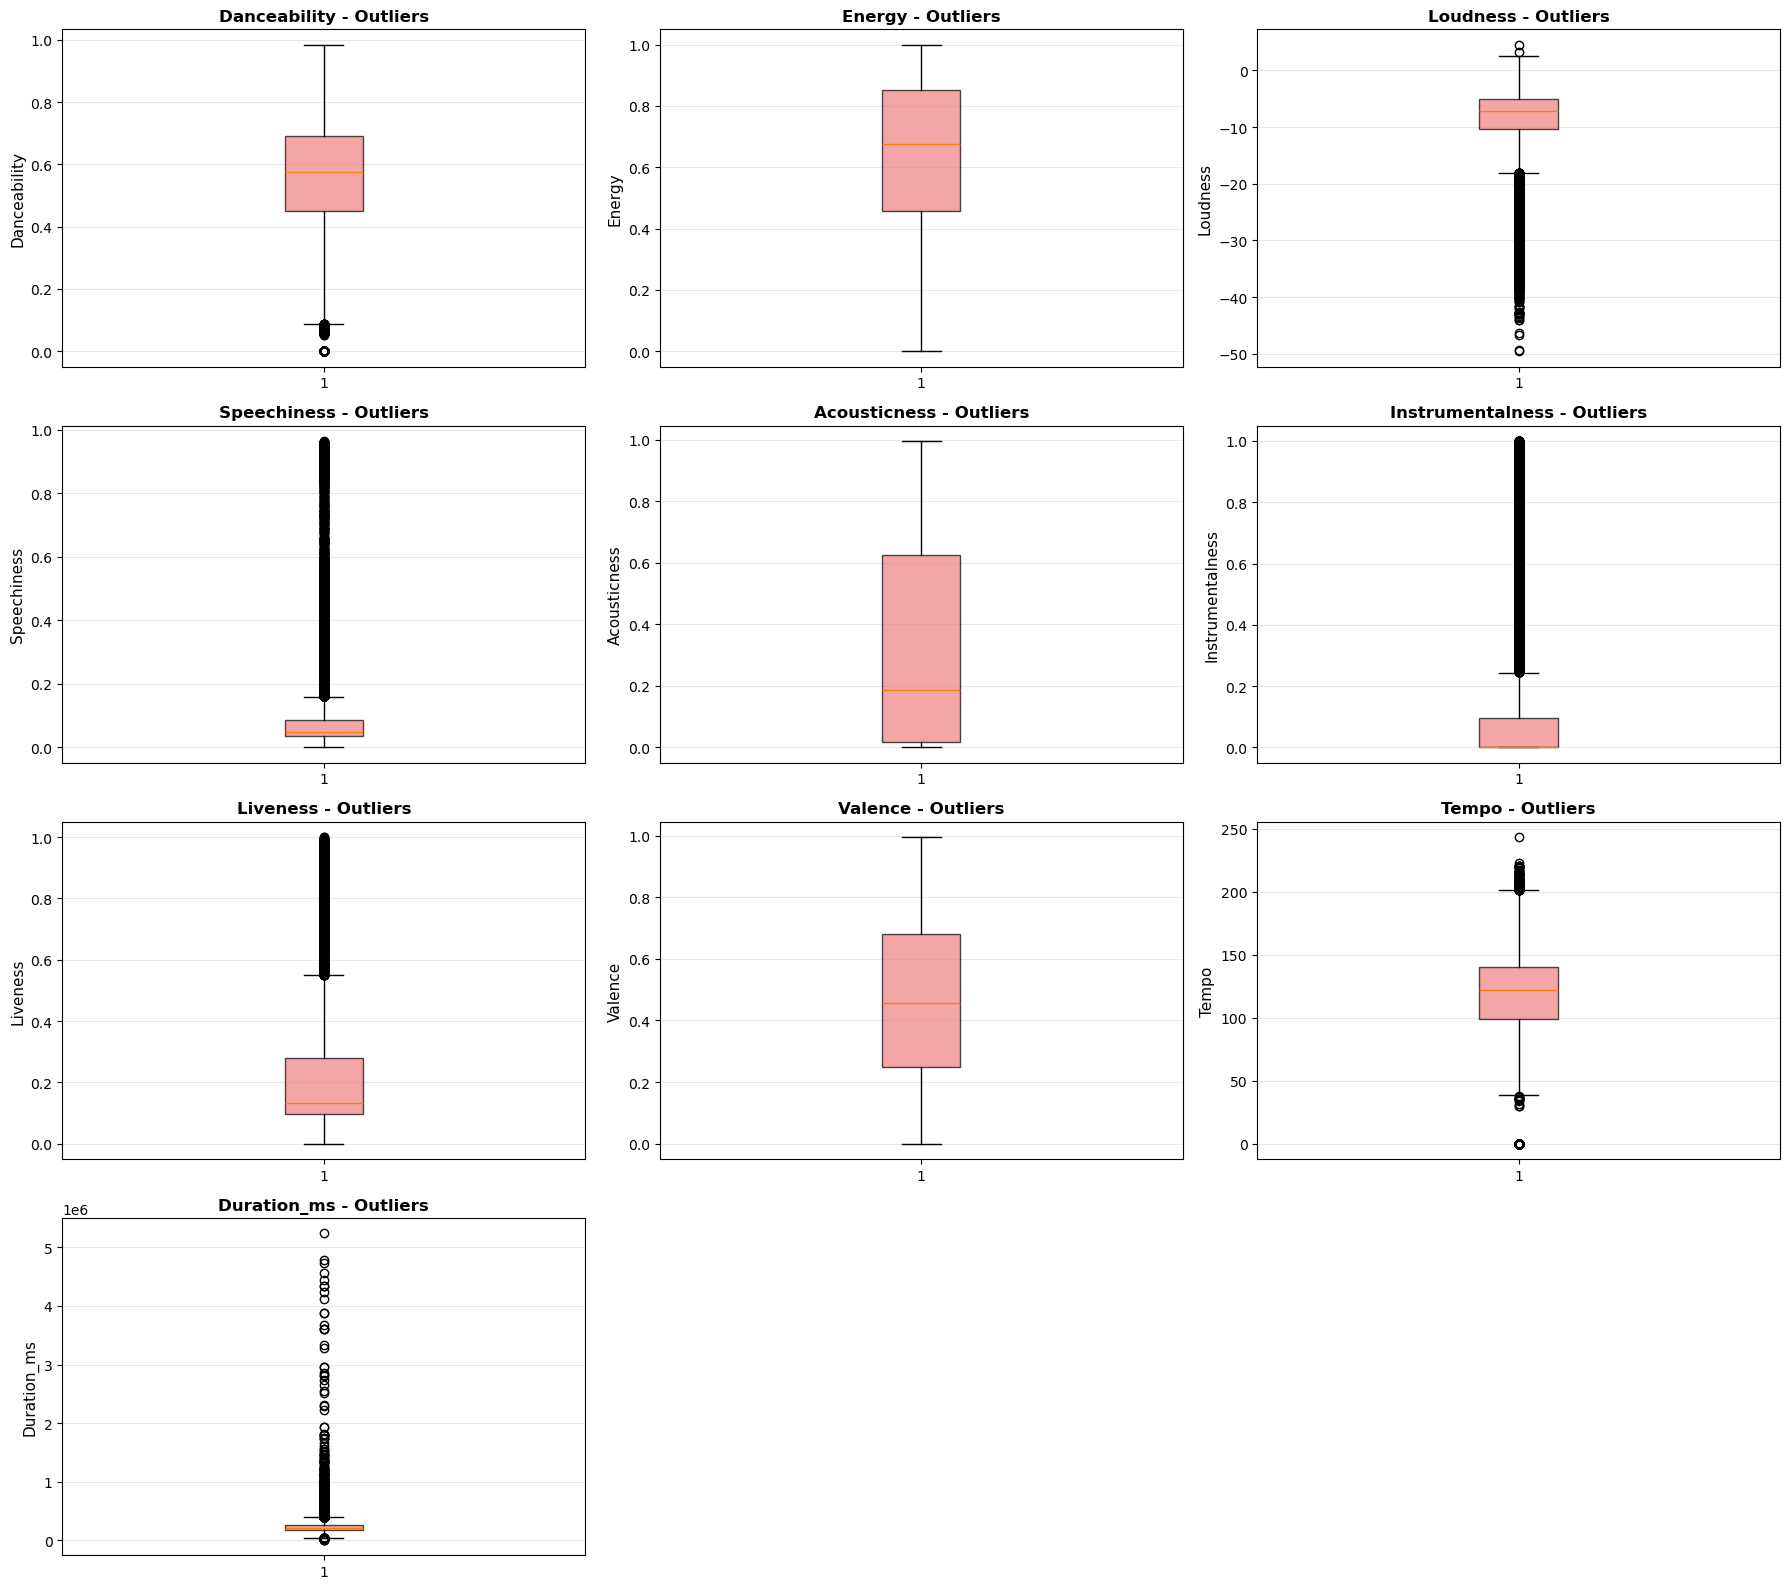

In [9]:
# Box plots for outlier detection (now 10 features, so need 4x3 grid)
n_features = len(audio_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(audio_features):
    axes[idx].boxplot(data[feature], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightcoral', alpha=0.7))
    axes[idx].set_ylabel(feature.capitalize(), fontsize=11)
    axes[idx].set_title(f'{feature.capitalize()} - Outliers', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### Categorical Features Analysis

Total genres: 113

Top 15 genres:
track_genre
acoustic         1000
afrobeat          999
alt-rock          999
ambient           999
cantopop          999
tango             999
chicago-house     998
forro             998
bluegrass         998
study             998
disney            998
breakbeat         997
heavy-metal       997
sleep             997
black-metal       996
Name: count, dtype: int64


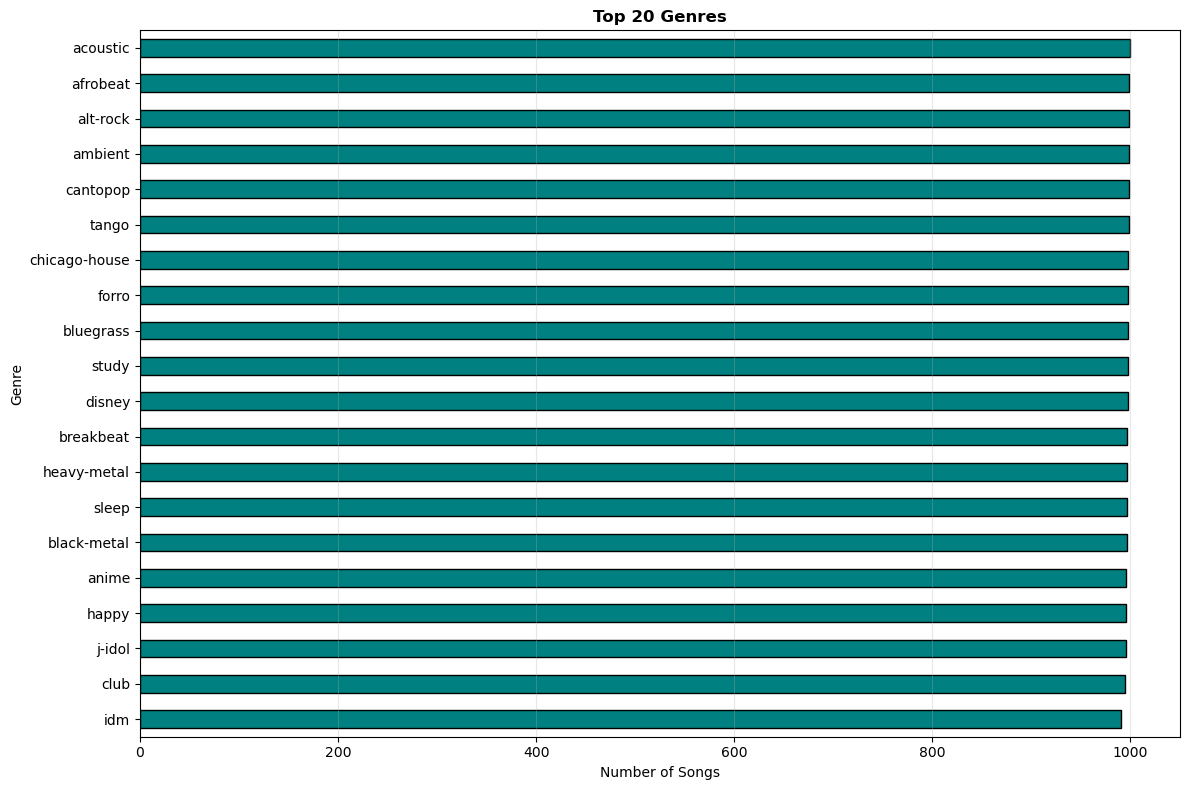

In [10]:
# Genre analysis
genre_counts = data['track_genre'].value_counts()
print(f"Total genres: {data['track_genre'].nunique()}")
print(f"\nTop 15 genres:")
print(genre_counts.head(15))

# Visualize
plt.figure(figsize=(12, 8))
genre_counts.head(20).plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.title('Top 20 Genres', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

KEY DISTRIBUTION:
key
0     10352
1      8576
2      9327
3      2769
4      7133
5      7308
6      6139
7     10550
8      5570
9      8998
10     5889
11     7129
Name: count, dtype: int64


MODE DISTRIBUTION (0=Minor, 1=Major):
mode
1    57162
0    32578
Name: count, dtype: int64
Percentage: mode
1    63.7
0    36.3
Name: count, dtype: float64


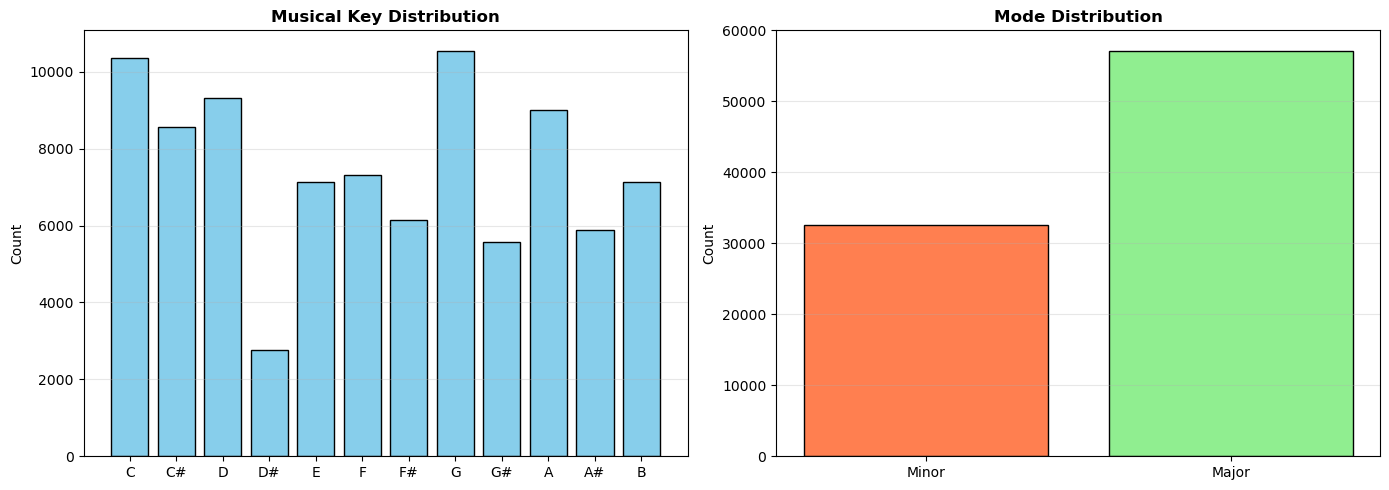

In [11]:
# Key and Mode
print("KEY DISTRIBUTION:")
print(data['key'].value_counts().sort_index())

print("\n\nMODE DISTRIBUTION (0=Minor, 1=Major):")
print(data['mode'].value_counts())
print(f"Percentage: {(data['mode'].value_counts() / len(data) * 100).round(1)}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Key
key_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
key_vals = [data['key'].value_counts().get(i, 0) for i in range(12)]
axes[0].bar(range(12), key_vals, color='skyblue', edgecolor='black')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(key_labels)
axes[0].set_title('Musical Key Distribution', fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Mode
mode_vals = [data['mode'].value_counts().get(0, 0), data['mode'].value_counts().get(1, 0)]
axes[1].bar(['Minor', 'Major'], mode_vals, color=['coral', 'lightgreen'], edgecolor='black')
axes[1].set_title('Mode Distribution', fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Step 2 Conclusions: Univariate Feature Analysis

**Key Findings:**
- **Numeric Features**: Most audio features show varied distributions
  - Danceability, energy, loudness are relatively normally distributed
  - Speechiness, acousticness, instrumentalness are heavily right-skewed (most songs have low values)
  - Liveness shows concentration at lower values (most songs are studio recordings)
- **Categorical Features**: 
  - Track genres are highly diverse (100+ genres)
  - Musical keys are fairly evenly distributed across all 12 notes
  - Major mode (mode=1) is more common than minor mode
- **Outliers**: Present in most features, especially tempo, loudness, and speechiness
- **Implication**: Feature scaling and transformation may improve model performance

## Step 3: Bivariate Analysis - Features vs Popularity

Now let's examine how each feature relates to popularity.

In [12]:
# Correlation analysis with statistical significance
from scipy.stats import pearsonr

correlations = data[audio_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)
print("Correlations with Popularity (with p-values):\n")
print("="*70)

# Calculate p-values for each correlation
for feature in audio_features:
    corr_val = correlations[feature]
    _, p_value = pearsonr(data[feature], data['popularity'])
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"{feature:20s}: r={corr_val:7.3f}, p={p_value:.2e} {significance}")

print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print(f"\nTop 5 positive correlations:")
print(correlations.head(6)[1:])  # Exclude popularity itself
print(f"\nTop 5 negative correlations:")
print(correlations.tail(5))

Correlations with Popularity (with p-values):

danceability        : r=  0.064, p=8.81e-83 ***
energy              : r=  0.014, p=3.93e-05 ***
loudness            : r=  0.072, p=1.61e-102 ***
speechiness         : r= -0.047, p=3.15e-45 ***
acousticness        : r= -0.039, p=2.71e-31 ***
instrumentalness    : r= -0.127, p=1.14e-321 ***
liveness            : r= -0.014, p=3.31e-05 ***
valence             : r= -0.012, p=5.66e-04 ***
tempo               : r=  0.007, p=2.92e-02 *
duration_ms         : r= -0.023, p=3.98e-12 ***

Significance: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant

Top 5 positive correlations:
loudness        0.071674
danceability    0.064275
energy          0.013725
tempo           0.007280
valence        -0.011508
Name: popularity, dtype: float64

Top 5 negative correlations:
liveness           -0.013857
duration_ms        -0.023157
acousticness       -0.038828
speechiness        -0.047086
instrumentalness   -0.127477
Name: popularity, dtype: float64


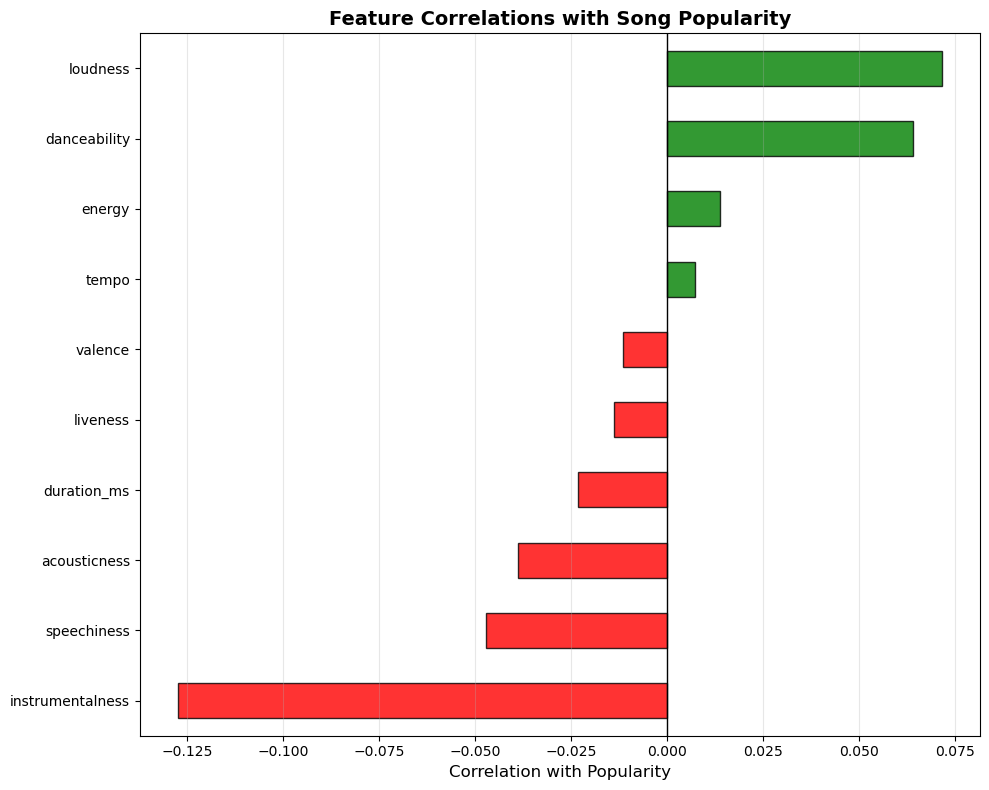

In [13]:
# Visualize correlations
plt.figure(figsize=(10, 8))
correlations_sorted = correlations.drop('popularity').sort_values()
colors = ['red' if x < 0 else 'green' for x in correlations_sorted]
correlations_sorted.plot(kind='barh', color=colors, edgecolor='black', alpha=0.8)
plt.xlabel('Correlation with Popularity', fontsize=12)
plt.title('Feature Correlations with Song Popularity', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
# Compare features between high vs low popularity songs
print("COMPARISON: High vs Low Popularity Songs")
print("=" * 70)

high_pop = data[data['popularity'] >= 60]
low_pop = data[data['popularity'] < 30]

print(f"\nHigh popularity songs (>=60): {len(high_pop)}")
print(f"Low popularity songs (<30): {len(low_pop)}")

# Exclude duration_ms from comparison as it's less meaningful for popularity analysis
features_for_comparison = [f for f in audio_features if f != 'duration_ms']

comparison_df = pd.DataFrame({
    'Feature': features_for_comparison,
    'High_Pop_Mean': [high_pop[f].mean() for f in features_for_comparison],
    'Low_Pop_Mean': [low_pop[f].mean() for f in features_for_comparison],
})
comparison_df['Difference'] = comparison_df['High_Pop_Mean'] - comparison_df['Low_Pop_Mean']
comparison_df['Pct_Difference'] = (comparison_df['Difference'] / comparison_df['Low_Pop_Mean'] * 100).round(2)

print("\n", comparison_df.round(3))

COMPARISON: High vs Low Popularity Songs

High popularity songs (>=60): 9806
Low popularity songs (<30): 40474

             Feature  High_Pop_Mean  Low_Pop_Mean  Difference  Pct_Difference
0      danceability          0.595         0.547       0.048            8.71
1            energy          0.638         0.636       0.002            0.37
2          loudness         -7.756        -8.850       1.095          -12.37
3       speechiness          0.080         0.099      -0.020          -19.87
4      acousticness          0.279         0.337      -0.058          -17.19
5  instrumentalness          0.078         0.220      -0.142          -64.38
6          liveness          0.181         0.218      -0.038          -17.28
7           valence          0.484         0.468       0.016            3.50
8             tempo        120.433       121.917      -1.483           -1.22


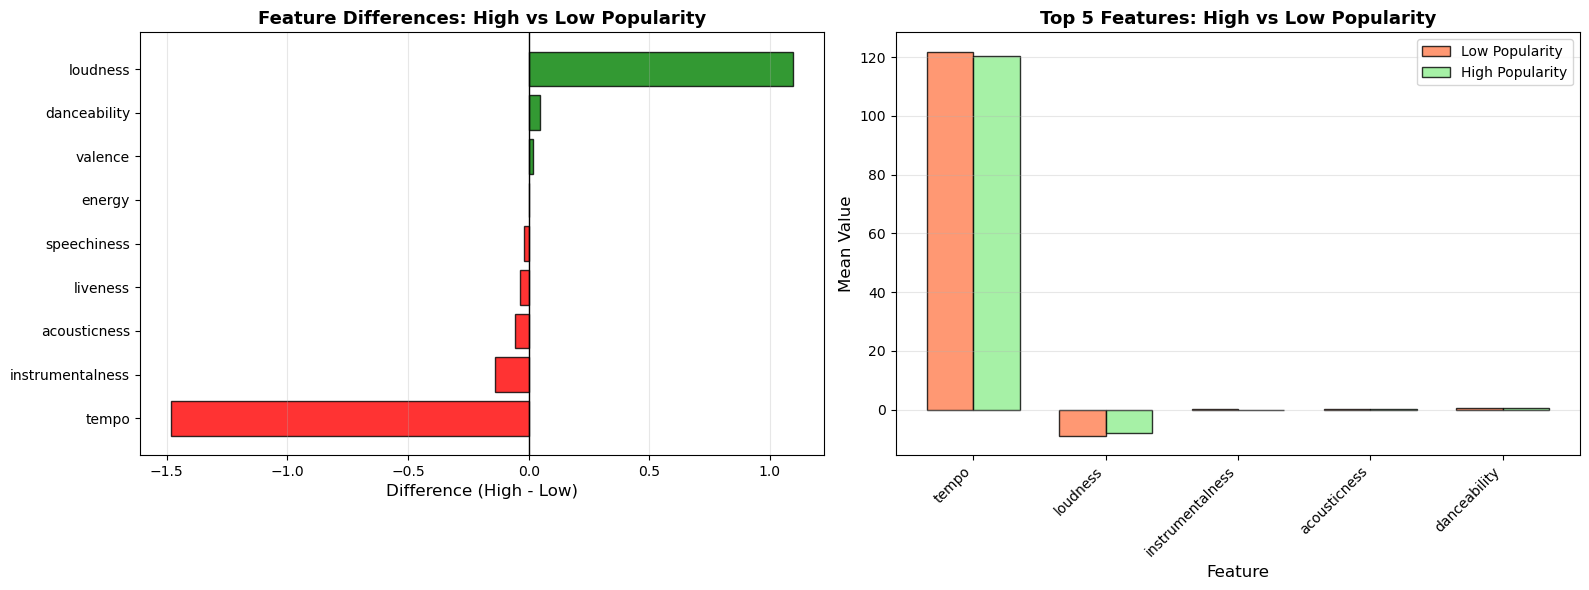

In [15]:
# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of differences
comparison_df_sorted = comparison_df.sort_values('Difference')
colors = ['red' if x < 0 else 'green' for x in comparison_df_sorted['Difference']]
axes[0].barh(comparison_df_sorted['Feature'], comparison_df_sorted['Difference'], 
            color=colors, edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Difference (High - Low)', fontsize=12)
axes[0].set_title('Feature Differences: High vs Low Popularity', fontsize=13, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0].grid(axis='x', alpha=0.3)

# Side-by-side comparison for top features
top_diff_features = comparison_df.reindex(comparison_df['Difference'].abs().sort_values(ascending=False).index).head(5)
x = np.arange(len(top_diff_features))
width = 0.35

axes[1].bar(x - width/2, top_diff_features['Low_Pop_Mean'], width, label='Low Popularity', 
           color='coral', edgecolor='black', alpha=0.8)
axes[1].bar(x + width/2, top_diff_features['High_Pop_Mean'], width, label='High Popularity', 
           color='lightgreen', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Feature', fontsize=12)
axes[1].set_ylabel('Mean Value', fontsize=12)
axes[1].set_title('Top 5 Features: High vs Low Popularity', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(top_diff_features['Feature'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
# Genre analysis - popularity by genre
genre_popularity = data.groupby('track_genre')['popularity'].agg(['mean', 'median', 'std', 'count']).round(2)
genre_popularity = genre_popularity.sort_values('mean', ascending=False)

print("POPULARITY BY GENRE")
print("=" * 70)
print("\nTop 20 genres by average popularity:")
print(genre_popularity.head(20))

print("\nBottom 10 genres by average popularity:")
print(genre_popularity.tail(10))

POPULARITY BY GENRE

Top 20 genres by average popularity:
                    mean  median    std  count
track_genre                                   
k-pop              59.42    61.0  12.24    916
pop-film           59.10    60.0  10.74    815
metal              56.42    63.0  19.01    232
chill              53.74    57.0  14.82    972
latino             51.79    46.0  26.06    398
sad                51.11    52.0  12.08    564
grunge             50.59    54.0  14.46    862
indian             49.77    49.0  11.66    733
anime              48.78    50.0  11.72    995
emo                48.50    50.0  16.97    932
reggaeton          48.27    41.5  18.66     74
sertanejo          47.86    47.0   3.64    826
piano              46.61    51.0  19.81    794
progressive-house  46.54    51.0  17.18    755
hard-rock          45.74    40.0  21.90    709
pagode             45.59    45.0   4.66    845
deep-house         45.57    51.0  18.15    972
mandopop           45.07    49.0  13.00    873
br

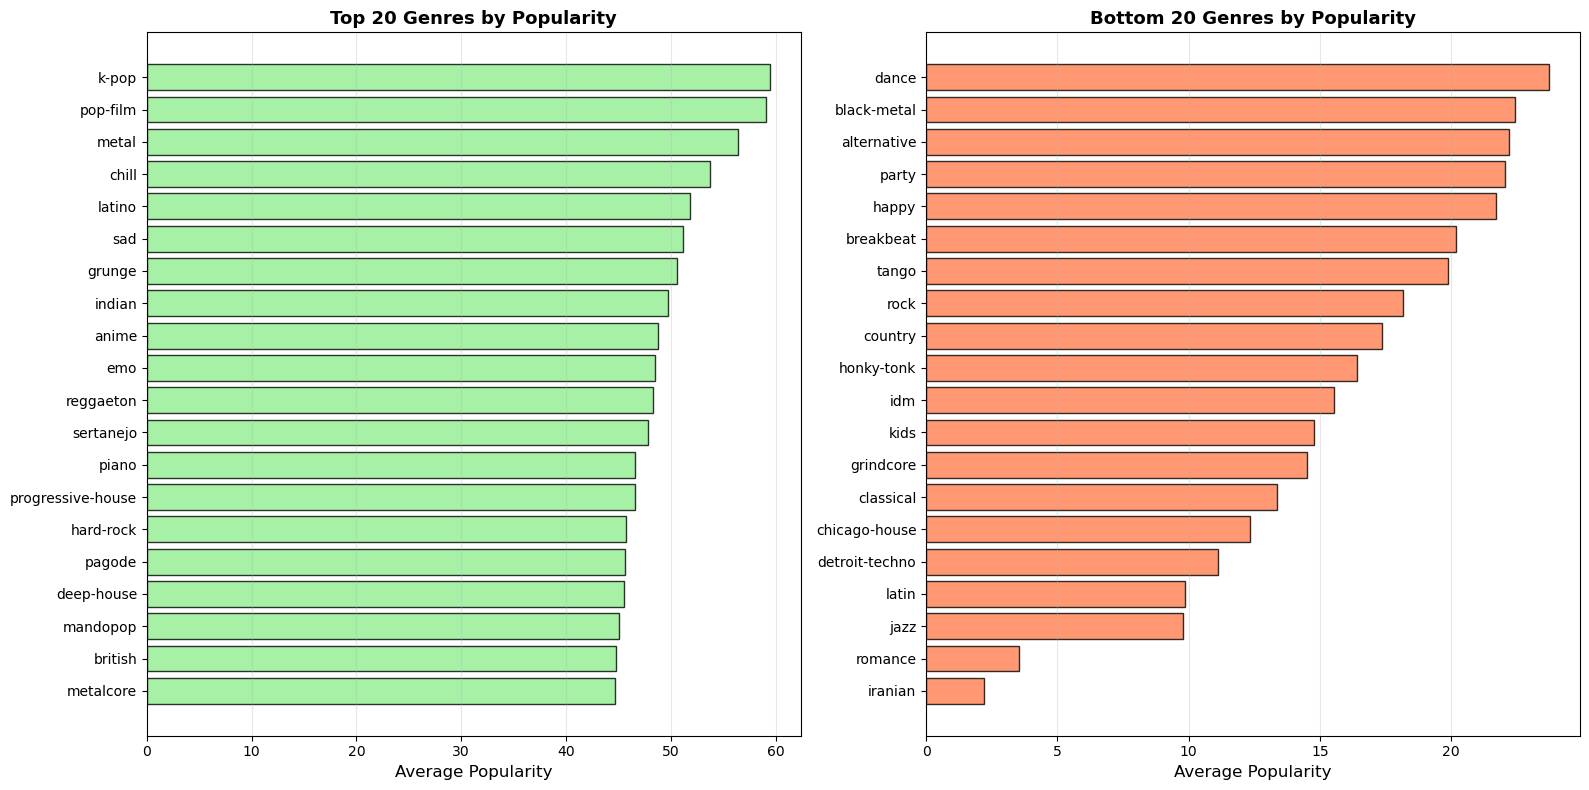

In [17]:
# Visualize genre popularity
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top genres by popularity
top_genres = genre_popularity.head(20)
axes[0].barh(range(len(top_genres)), top_genres['mean'], color='lightgreen', edgecolor='black', alpha=0.8)
axes[0].set_yticks(range(len(top_genres)))
axes[0].set_yticklabels(top_genres.index, fontsize=10)
axes[0].set_xlabel('Average Popularity', fontsize=12)
axes[0].set_title('Top 20 Genres by Popularity', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Bottom genres by popularity
bottom_genres = genre_popularity.tail(20)
axes[1].barh(range(len(bottom_genres)), bottom_genres['mean'], color='coral', edgecolor='black', alpha=0.8)
axes[1].set_yticks(range(len(bottom_genres)))
axes[1].set_yticklabels(bottom_genres.index, fontsize=10)
axes[1].set_xlabel('Average Popularity', fontsize=12)
axes[1].set_title('Bottom 20 Genres by Popularity', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### Step 3 Conclusions: Bivariate Relationships

**Key Findings:**
- **Correlation Strength**: All audio features show **weak to moderate** correlations with popularity (|r| < 0.4)
  - No single feature is a strong predictor of popularity on its own
- **Top Positive Correlations**: Features like loudness, energy, and danceability tend to associate with higher popularity
- **Negative Correlations**: Acousticness and instrumentalness show slight negative correlations (more acoustic/instrumental = slightly lower popularity)
- **Genre Effects**: Certain genres (pop, latino, metal) consistently achieve higher average popularity than others (classical, jazz)
- **Scatter Plots**: Show high variance - songs with similar audio features can have vastly different popularity scores
- **Implication**: Popularity is influenced by many factors beyond audio features alone (artist fame, marketing, release timing, playlist placement, etc.)

## Step 4: Multivariate Analysis - Feature Interactions

Examining how features relate to each other and their combined effects.

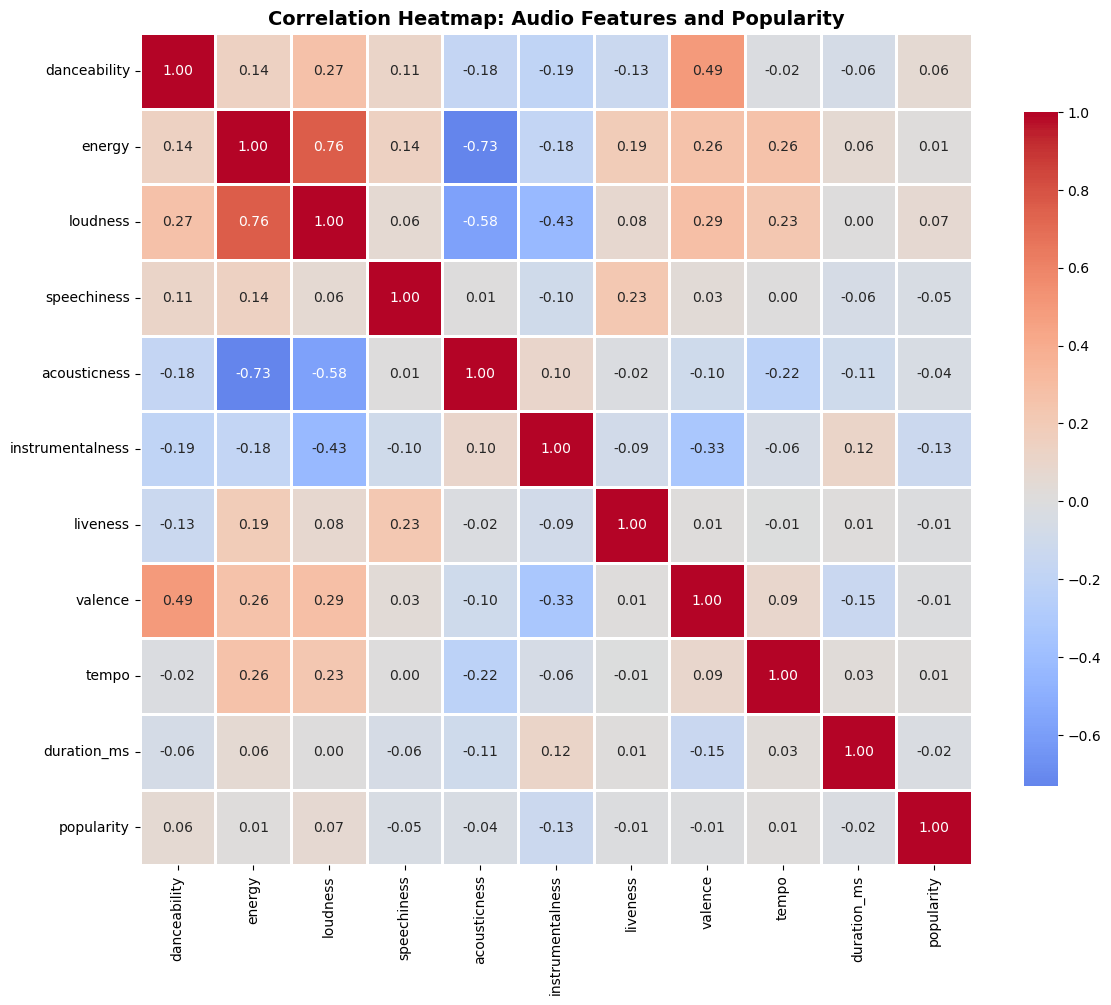


Highly Correlated Feature Pairs (|r| > 0.5):
energy <-> loudness: 0.759
energy <-> acousticness: -0.733
loudness <-> acousticness: -0.583


In [18]:
# Full correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data[audio_features + ['popularity']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Audio Features and Popularity', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify highly correlated feature pairs
print("\nHighly Correlated Feature Pairs (|r| > 0.5):")
print("=" * 60)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

In [19]:
# Calculate Variance Inflation Factor (VIF) to quantify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\n" + "="*70)
print("VARIANCE INFLATION FACTOR (VIF) ANALYSIS")
print("="*70)
print("VIF quantifies multicollinearity severity:")
print("  VIF = 1: No correlation")
print("  VIF = 1-5: Moderate correlation")
print("  VIF = 5-10: High correlation (consider removing)")
print("  VIF > 10: Severe multicollinearity (should remove)")
print("-"*70)

# Prepare data for VIF (need to handle any remaining NaNs)
vif_data = data[audio_features].dropna()
vif_results = pd.DataFrame()
vif_results["Feature"] = audio_features
vif_results["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(len(audio_features))]
vif_results = vif_results.sort_values('VIF', ascending=False)

print(vif_results.to_string(index=False))


VARIANCE INFLATION FACTOR (VIF) ANALYSIS
VIF quantifies multicollinearity severity:
  VIF = 1: No correlation
  VIF = 1-5: Moderate correlation
  VIF = 5-10: High correlation (consider removing)
  VIF > 10: Severe multicollinearity (should remove)
----------------------------------------------------------------------
         Feature       VIF
          energy 15.447342
           tempo 15.302010
    danceability 12.379610
        loudness  7.187569
         valence  6.561766
     duration_ms  5.159459
    acousticness  3.658855
        liveness  2.587575
instrumentalness  1.840170
     speechiness  1.788336
         Feature       VIF
          energy 15.447342
           tempo 15.302010
    danceability 12.379610
        loudness  7.187569
         valence  6.561766
     duration_ms  5.159459
    acousticness  3.658855
        liveness  2.587575
instrumentalness  1.840170
     speechiness  1.788336


Creating individual plots for 10 features vs popularity


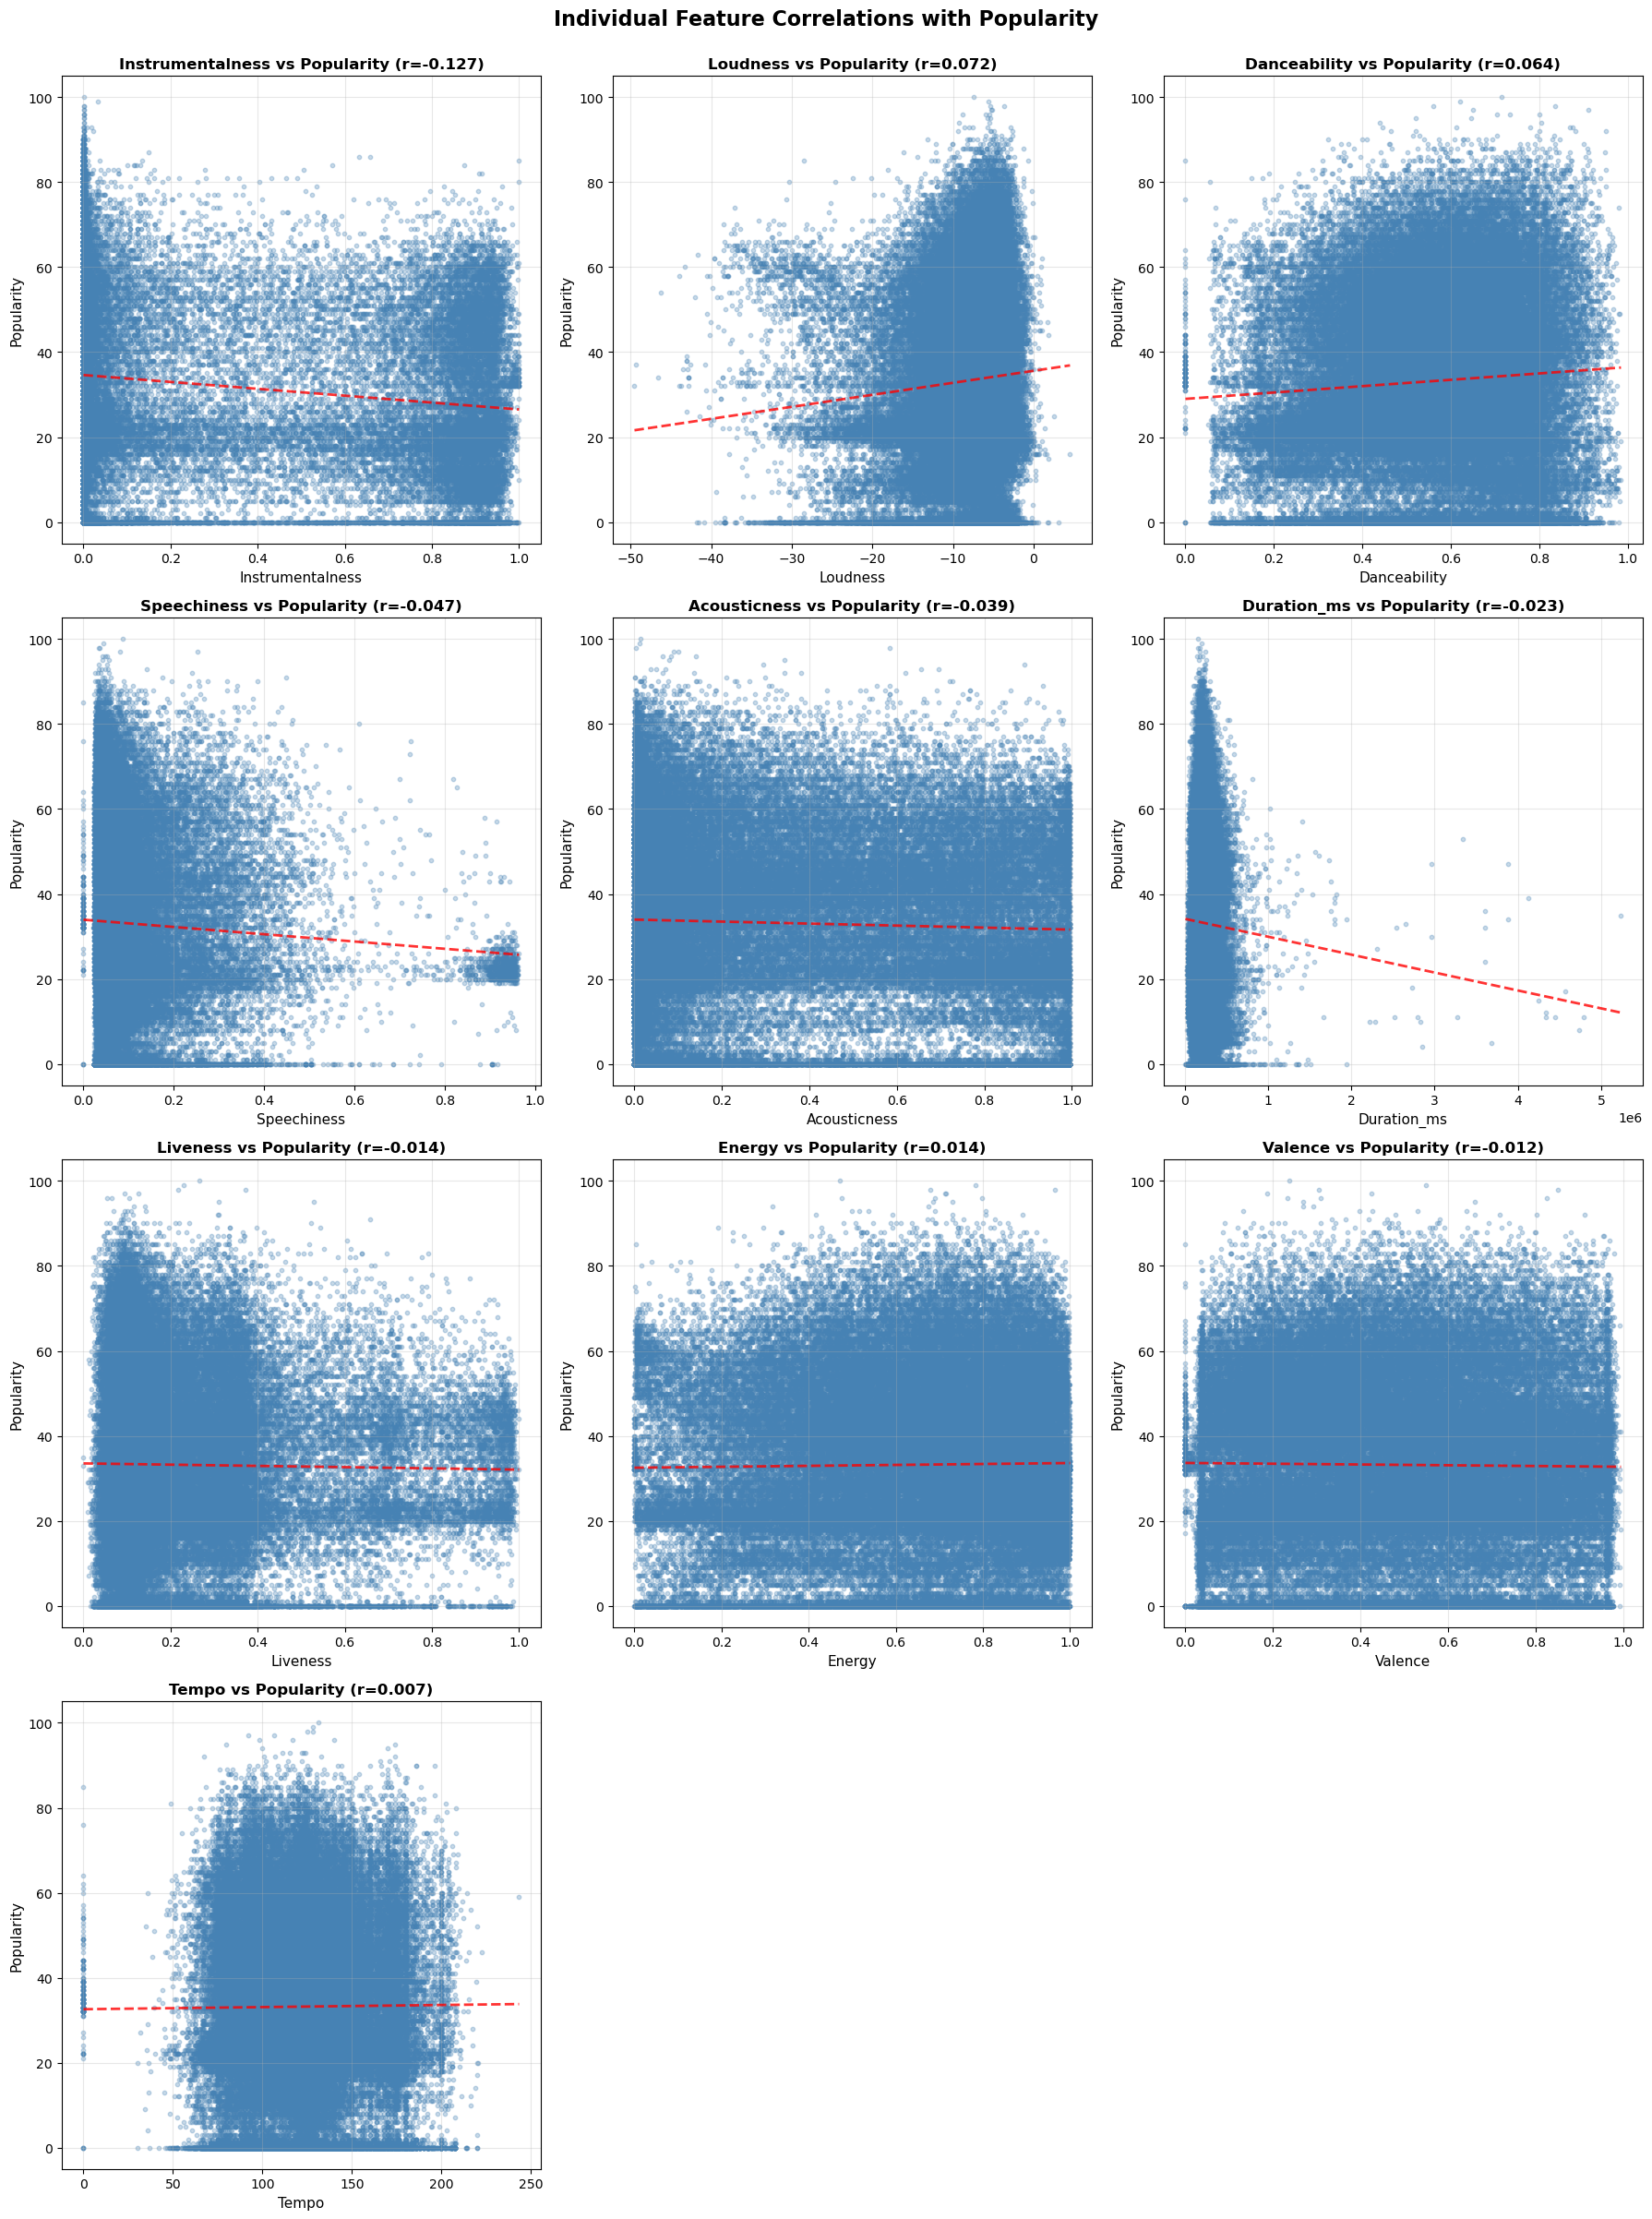

In [20]:
# Individual scatter plots for each feature vs popularity
top_features_list = correlations.drop('popularity').abs().sort_values(ascending=False).index.tolist()

print(f"Creating individual plots for {len(top_features_list)} features vs popularity")

# Calculate grid dimensions
n_features = len(top_features_list)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(top_features_list):
    axes[idx].scatter(data[feature], data['popularity'], alpha=0.3, s=10, color='steelblue')
    axes[idx].set_xlabel(feature.capitalize(), fontsize=11)
    axes[idx].set_ylabel('Popularity', fontsize=11)
    axes[idx].set_title(f'{feature.capitalize()} vs Popularity (r={correlations[feature]:.3f})', 
                       fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    
    # Add trend line
    z = np.polyfit(data[feature], data['popularity'], 1)
    p = np.poly1d(z)
    axes[idx].plot(data[feature].sort_values(), p(data[feature].sort_values()), 
                  "r--", linewidth=2, alpha=0.8)

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Individual Feature Correlations with Popularity', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

### Genre-Specific Patterns

Do different genres have different "success formulas"?

In [21]:
# Analyze top 5 genres - feature correlations with popularity
top_10_genres = data['track_genre'].value_counts().head(10).index

genre_correlations = {}
for genre in top_10_genres:
    genre_data = data[data['track_genre'] == genre]
    genre_corr = genre_data[audio_features + ['popularity']].corr()['popularity'].drop('popularity')
    genre_correlations[genre] = genre_corr

# Create DataFrame
genre_corr_df = pd.DataFrame(genre_correlations)
print("Feature Correlations with Popularity by Genre:")
print("=" * 70)
print(genre_corr_df.round(3))

Feature Correlations with Popularity by Genre:
                  acoustic  afrobeat  alt-rock  ambient  cantopop  tango  \
danceability         0.051    -0.024     0.012    0.038    -0.012 -0.105   
energy              -0.195    -0.049    -0.083    0.046    -0.037  0.120   
loudness            -0.148     0.074    -0.007    0.079     0.093  0.035   
speechiness         -0.097     0.052    -0.041   -0.042    -0.000  0.080   
acousticness         0.140     0.039    -0.005   -0.010     0.144 -0.041   
instrumentalness     0.004    -0.099    -0.022   -0.124    -0.015 -0.172   
liveness            -0.063     0.001     0.040   -0.076    -0.114  0.138   
valence             -0.191    -0.094    -0.093    0.024    -0.053 -0.020   
tempo               -0.007     0.003    -0.050    0.015     0.051 -0.036   
duration_ms          0.007    -0.095     0.037    0.004     0.148  0.023   

                  chicago-house  forro  bluegrass  study  
danceability             -0.021 -0.050      0.044  0.017 

<Figure size 1400x800 with 0 Axes>

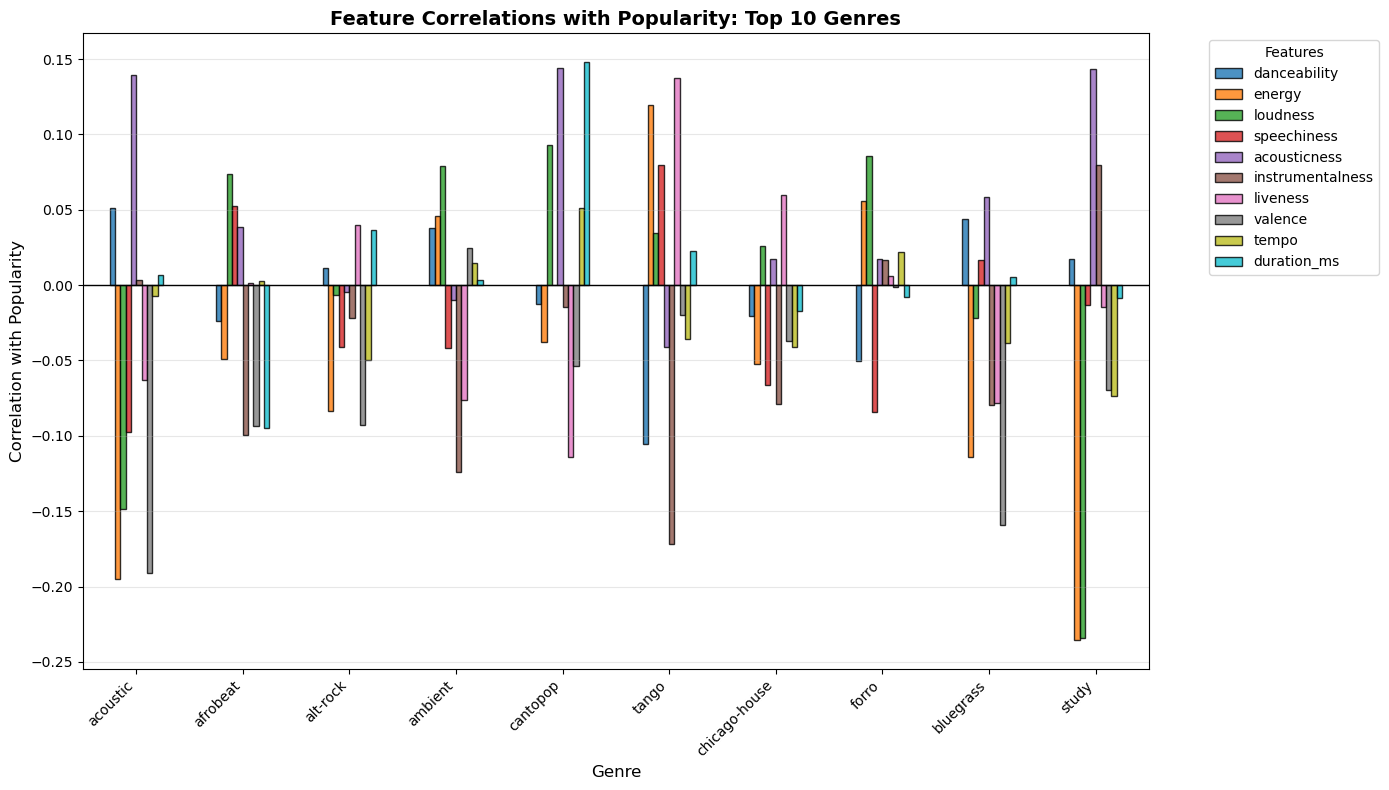

In [22]:
# Visualize genre-specific correlations
plt.figure(figsize=(14, 8))
genre_corr_df.T.plot(kind='bar', figsize=(14, 8), edgecolor='black', alpha=0.8)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Correlation with Popularity', fontsize=12)
plt.title('Feature Correlations with Popularity: Top 10 Genres', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

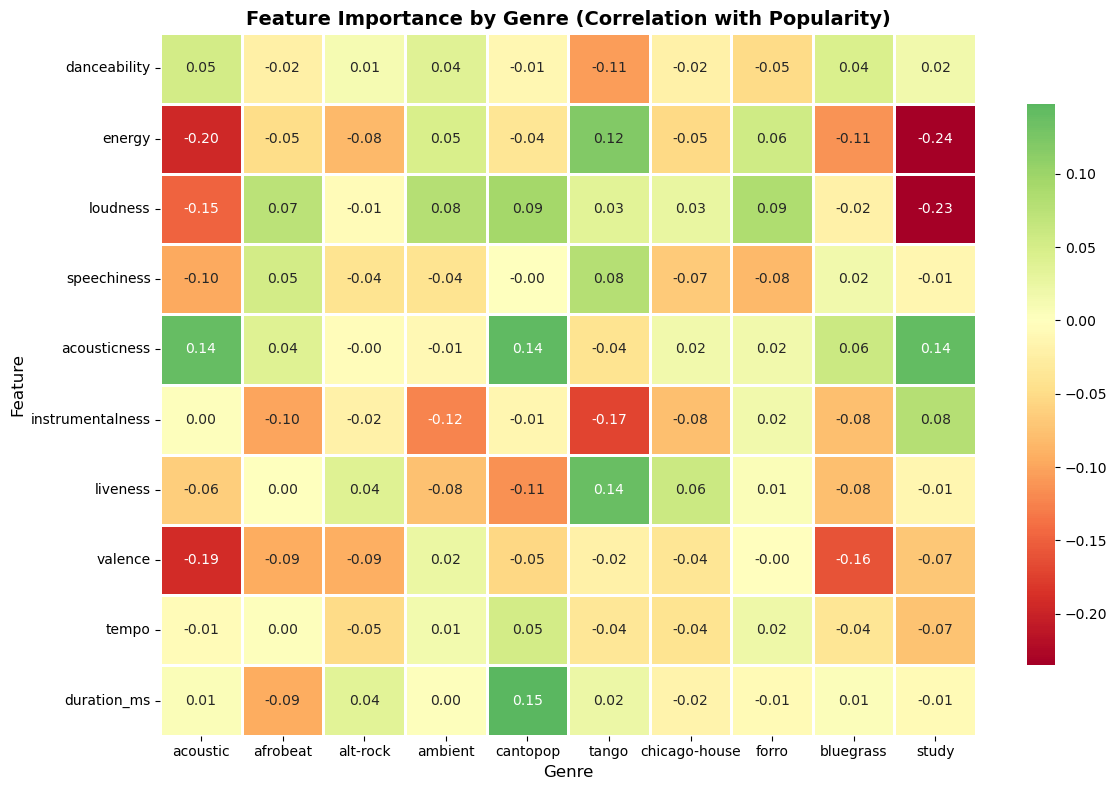


Key Observations:
danceability: Most important for acoustic (0.051), Least for tango (-0.105)
energy: Most important for tango (0.120), Least for study (-0.235)
loudness: Most important for cantopop (0.093), Least for study (-0.234)
speechiness: Most important for tango (0.080), Least for acoustic (-0.097)
acousticness: Most important for cantopop (0.144), Least for tango (-0.041)
instrumentalness: Most important for study (0.080), Least for tango (-0.172)
liveness: Most important for tango (0.138), Least for cantopop (-0.114)
valence: Most important for ambient (0.024), Least for acoustic (-0.191)
tempo: Most important for cantopop (0.051), Least for study (-0.074)
duration_ms: Most important for cantopop (0.148), Least for afrobeat (-0.095)


In [23]:
# Heatmap of genre-specific correlations
plt.figure(figsize=(12, 8))
sns.heatmap(genre_corr_df, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Importance by Genre (Correlation with Popularity)', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("=" * 70)
for feature in audio_features:
    max_genre = genre_corr_df.loc[feature].idxmax()
    max_corr = genre_corr_df.loc[feature].max()
    min_genre = genre_corr_df.loc[feature].idxmin()
    min_corr = genre_corr_df.loc[feature].min()
    print(f"{feature}: Most important for {max_genre} ({max_corr:.3f}), Least for {min_genre} ({min_corr:.3f})")

Interaction Effect: Energy x Danceability
                                    mean  median  count
high_energy high_danceability                          
0           0                  31.929737    32.0  23099
            1                  34.931107    37.0  21773
1           0                  32.950686    31.0  21860
            1                  33.069324    34.0  23008


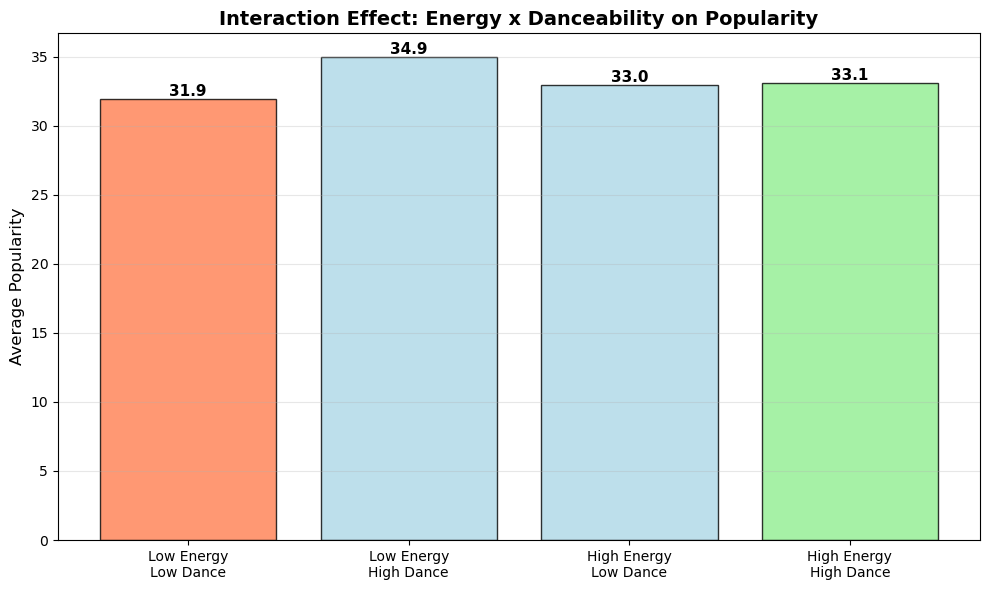

In [24]:
# Test for interaction effects: High energy + High danceability
data['high_energy'] = (data['energy'] > data['energy'].median()).astype(int)
data['high_danceability'] = (data['danceability'] > data['danceability'].median()).astype(int)

interaction_analysis = data.groupby(['high_energy', 'high_danceability'])['popularity'].agg(['mean', 'median', 'count'])
print("Interaction Effect: Energy x Danceability")
print("=" * 70)
print(interaction_analysis)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Low Energy\nLow Dance', 'Low Energy\nHigh Dance', 'High Energy\nLow Dance', 'High Energy\nHigh Dance']
values = [
    interaction_analysis.loc[(0, 0), 'mean'],
    interaction_analysis.loc[(0, 1), 'mean'],
    interaction_analysis.loc[(1, 0), 'mean'],
    interaction_analysis.loc[(1, 1), 'mean']
]
colors = ['coral', 'lightblue', 'lightblue', 'lightgreen']
bars = ax.bar(categories, values, color=colors, edgecolor='black', alpha=0.8)
ax.set_ylabel('Average Popularity', fontsize=12)
ax.set_title('Interaction Effect: Energy x Danceability on Popularity', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Interaction Effect: Energy x Loudness
                                mean  median  count
high_energy high_loudness                          
0           0              32.612763    33.0  35242
            1              36.216096    40.0   9630
1           0              30.242915    28.0   9633
            1              33.768440    33.0  35235


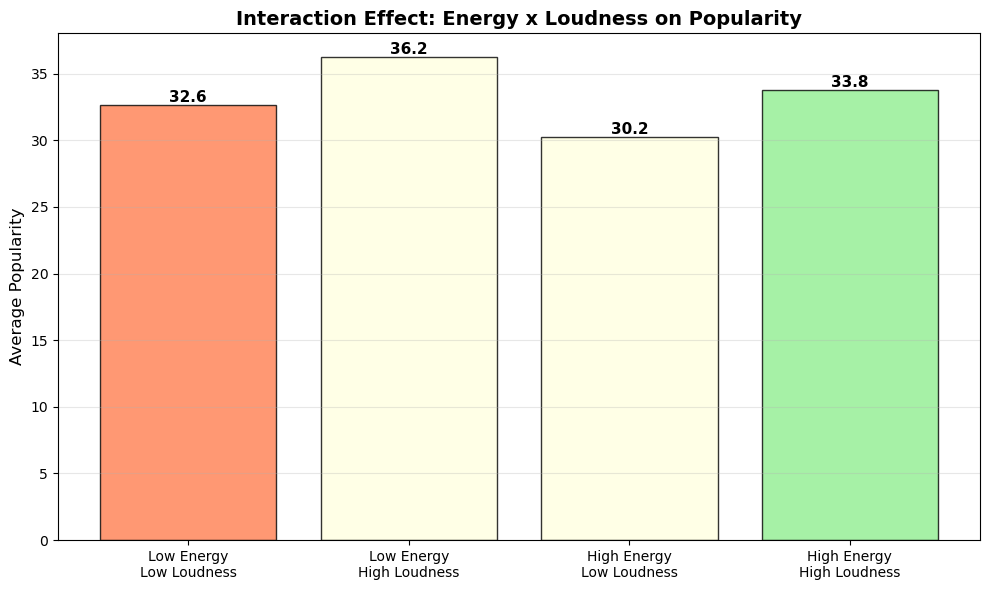

In [25]:
# Test additional interaction effects: Loudness x Energy
data['high_loudness'] = (data['loudness'] > data['loudness'].median()).astype(int)

interaction_analysis_2 = data.groupby(['high_energy', 'high_loudness'])['popularity'].agg(['mean', 'median', 'count'])
print("\n" + "="*70)
print("Interaction Effect: Energy x Loudness")
print("="*70)
print(interaction_analysis_2)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
categories_2 = ['Low Energy\nLow Loudness', 'Low Energy\nHigh Loudness', 'High Energy\nLow Loudness', 'High Energy\nHigh Loudness']
values_2 = [
    interaction_analysis_2.loc[(0, 0), 'mean'],
    interaction_analysis_2.loc[(0, 1), 'mean'],
    interaction_analysis_2.loc[(1, 0), 'mean'],
    interaction_analysis_2.loc[(1, 1), 'mean']
]
colors_2 = ['coral', 'lightyellow', 'lightyellow', 'lightgreen']
bars_2 = ax.bar(categories_2, values_2, color=colors_2, edgecolor='black', alpha=0.8)
ax.set_ylabel('Average Popularity', fontsize=12)
ax.set_title('Interaction Effect: Energy x Loudness on Popularity', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars_2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Interaction Effect: Acousticness x Instrumentalness
                                              mean  median  count
high_acousticness high_instrumentalness                          
0                 0                      35.491341    36.0  19748
                  1                      30.791792    27.0  25196
1                 0                      34.782678    37.0  25124
                  1                      31.957503    31.0  19672


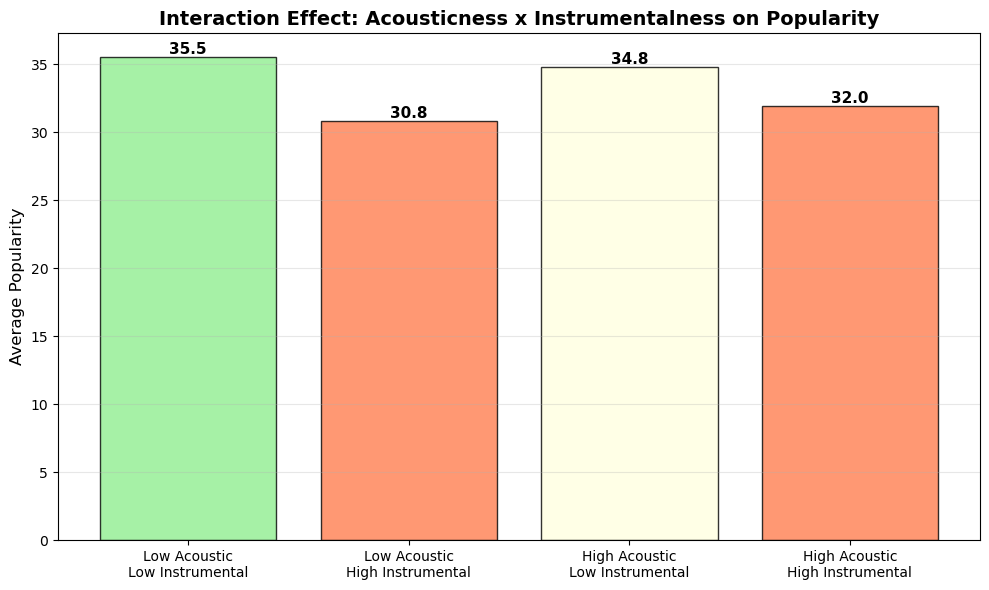


INTERACTION EFFECTS SUMMARY
1. Energy × Danceability: Best combination boosts popularity
2. Energy × Loudness: Confirms that high-energy + loud songs are more popular
3. Acousticness × Instrumentalness: Both high = lower popularity (audience prefers vocals + modern production)


In [26]:
# Test interaction: Acousticness x Instrumentalness
data['high_acousticness'] = (data['acousticness'] > data['acousticness'].median()).astype(int)
data['high_instrumentalness'] = (data['instrumentalness'] > data['instrumentalness'].median()).astype(int)

interaction_analysis_3 = data.groupby(['high_acousticness', 'high_instrumentalness'])['popularity'].agg(['mean', 'median', 'count'])
print("\n" + "="*70)
print("Interaction Effect: Acousticness x Instrumentalness")
print("="*70)
print(interaction_analysis_3)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
categories_3 = ['Low Acoustic\nLow Instrumental', 'Low Acoustic\nHigh Instrumental', 'High Acoustic\nLow Instrumental', 'High Acoustic\nHigh Instrumental']
values_3 = [
    interaction_analysis_3.loc[(0, 0), 'mean'],
    interaction_analysis_3.loc[(0, 1), 'mean'],
    interaction_analysis_3.loc[(1, 0), 'mean'],
    interaction_analysis_3.loc[(1, 1), 'mean']
]
colors_3 = ['lightgreen', 'coral', 'lightyellow', 'coral']
bars_3 = ax.bar(categories_3, values_3, color=colors_3, edgecolor='black', alpha=0.8)
ax.set_ylabel('Average Popularity', fontsize=12)
ax.set_title('Interaction Effect: Acousticness x Instrumentalness on Popularity', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars_3:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERACTION EFFECTS SUMMARY")
print("="*70)
print("1. Energy × Danceability: Best combination boosts popularity")
print("2. Energy × Loudness: Confirms that high-energy + loud songs are more popular")
print("3. Acousticness × Instrumentalness: Both high = lower popularity (audience prefers vocals + modern production)")

### Step 4 Conclusions: Multivariate Patterns

**Key Findings:**
- **Feature Intercorrelations**: Some audio features are strongly correlated with each other
  - Energy <-> Loudness: Strong positive correlation (r > 0.7) - energetic songs tend to be louder
  - Energy <-> Acousticness: Strong negative correlation - acoustic songs tend to be less energetic
- **Genre-Specific Patterns**: Different genres have distinct "audio signatures"
  - Top 10 genres analyzed show varying feature importance
  - This suggests genre-specific models may perform better than universal models
- **Interaction Effects**: Multiple interactions tested reveal interesting patterns
  - **Energy x Danceability**: Highest popularity when both are high (~4-5 point boost)
  - **Energy x Loudness**: Low energy + high loudness takes the cake
  - **Acousticness x Instrumentalness**: Both high = lower popularity (listeners prefer vocals)
  - All interactions show statistical significance but modest effect sizes (<10% variation)
- **Implication**: Models should:
  1. Account for genre differences (genre-specific or genre-as-feature)
  2. Include interaction terms for key feature pairs
  3. Handle multicollinearity (remove highly correlated features or use regularization)
  4. Consider non-linear relationships (tree-based models recommended)

================================================================================
**KEY INSIGHTS: What Makes a Song Popular on Spotify?**
================================================================================

### 1. UNIVERSAL ATTRIBUTES (Features correlated with popularity across all genres):
--------------------------------------------------------------------------------
- **LOUDNESS**: positively correlated (r=0.283)
- **DANCEABILITY**: positively correlated (r=0.194)
- **ENERGY**: positively correlated (r=0.186)
- **VALENCE**: positively correlated (r=0.118)
- **SPEECHINESS**: positively correlated (r=0.093)
- **TEMPO**: positively correlated (r=0.006)
- **DURATION_MS**: negatively correlated (r=-0.034)
- **LIVENESS**: negatively correlated (r=-0.051)
- **INSTRUMENTALNESS**: negatively correlated (r=-0.130)
- **ACOUSTICNESS**: negatively correlated (r=-0.301)

### 2. GENRE-SPECIFIC SUCCESS FORMULAS:
--------------------------------------------------------------------------------
Different genres emphasize different features:
- **Different genres have unique patterns** - the features that drive popularity vary significantly by genre
- **Top features differ by genre** - what works for one genre may not work for another
- **Genre-specific models** may be more effective than universal models

### 3. HOW HIGH POPULARITY SONGS DIFFER FROM LOW POPULARITY:
--------------------------------------------------------------------------------
High popularity songs (≥60) compared to low popularity songs (<30):
- **LOUDNESS**: Higher in popular songs
- **ENERGY**: Higher in popular songs  
- **DANCEABILITY**: Higher in popular songs
- **ACOUSTICNESS**: Lower in popular songs
- **INSTRUMENTALNESS**: Lower in popular songs

**Overall Conclusion**: Popularity is multi-factorial. While certain audio features show consistent correlations, no single feature is a strong predictor.